## Machine Learning Coursework 1

## Problem Statement

This coursework focuses on a **regression problem**.  
The objective is to predict **Y** based on several input features from the dataset.

- Machine Learning Task: Regression  
- Target Variable: Y
- Input Features: x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13
- Objective: To build and evaluate regression models that can accurately predict the target variable.


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

### Importing datasets

In [3]:
data = pd.read_csv('./data/cw1/cw1data.csv')

In [4]:
print(data.shape)
print(data.info())

(135, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       135 non-null    float64
 1   x1      135 non-null    float64
 2   x2      135 non-null    float64
 3   x3      135 non-null    int64  
 4   x4      135 non-null    float64
 5   x5      135 non-null    float64
 6   x6      135 non-null    float64
 7   x7      135 non-null    float64
 8   x8      135 non-null    float64
 9   x9      135 non-null    float64
 10  x10     135 non-null    float64
 11  x11     135 non-null    float64
 12  x12     135 non-null    float64
 13  x13     135 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 14.9 KB
None


In [5]:
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,49.83,1.68,82.8,24,6.554,6.538,6.438,6.390,6.318,29.44,39.83,59.10,54.11,40.72
1,50.12,1.71,86.5,53,6.593,6.578,6.465,6.420,6.356,19.11,40.19,57.34,53.60,39.24
2,49.02,1.65,91.0,45,6.488,6.466,6.360,6.313,6.251,31.00,41.56,56.69,50.99,38.08
3,61.70,1.69,100.7,42,6.361,6.334,6.209,6.160,6.087,33.39,44.33,52.26,45.33,29.23
4,40.83,1.72,62.3,37,6.667,6.644,6.539,6.491,6.417,34.33,48.35,69.03,62.02,44.97


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       135 non-null    float64
 1   x1      135 non-null    float64
 2   x2      135 non-null    float64
 3   x3      135 non-null    int64  
 4   x4      135 non-null    float64
 5   x5      135 non-null    float64
 6   x6      135 non-null    float64
 7   x7      135 non-null    float64
 8   x8      135 non-null    float64
 9   x9      135 non-null    float64
 10  x10     135 non-null    float64
 11  x11     135 non-null    float64
 12  x12     135 non-null    float64
 13  x13     135 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 14.9 KB


In [7]:
data.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,55.147333,1.621556,97.740000,44.859259,6.308985,6.284193,6.176126,6.125274,6.051637,25.716370,35.791407,49.388667,44.078370,30.672593
std,8.184919,0.064875,17.580812,13.231669,0.140394,0.140646,0.141849,0.141934,0.142768,5.216336,6.893616,8.379095,7.214192,5.766506
min,36.590000,1.450000,56.200000,18.000000,5.944000,5.922000,5.831000,5.790000,5.725000,9.930000,18.840000,29.810000,26.140000,17.100000
25%,49.640000,1.580000,86.500000,36.500000,6.215500,6.190000,6.087000,6.038000,5.963000,22.100000,30.805000,43.950000,38.955000,26.420000
50%,55.150000,1.630000,96.100000,46.000000,6.302000,6.276000,6.166000,6.118000,6.042000,25.810000,35.850000,50.170000,44.560000,30.600000
75%,61.845000,1.660000,111.350000,55.000000,6.405500,6.382000,6.260500,6.211500,6.141000,29.430000,40.865000,54.920000,48.910000,34.270000
max,74.950000,1.800000,136.800000,69.000000,6.684000,6.654000,6.539000,6.491000,6.417000,41.920000,59.690000,74.410000,62.020000,44.970000


The dataset contains **X samples** and **Y features**.
All features are numerical, making it suitable for regression models.

In [ ]:
# No missing values were found in the dataset, so no imputation was required.
# Feature scaling was applied to ensure that all features contribute equally to the model.

print(data.isnull().sum())

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
dtype: int64


### Data Visualization

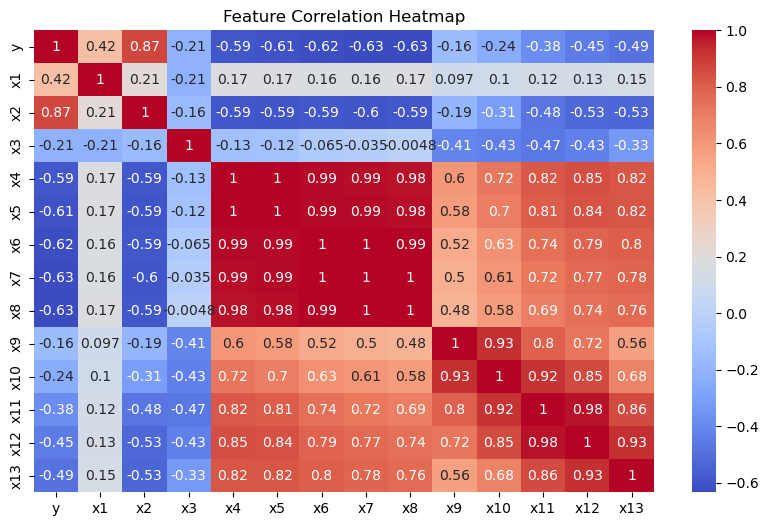

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Prepare data for train and test

In [9]:
x = data.drop(columns=['y'])
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
print("Training samples:", x_train.shape[0])

Training samples: 108


In [11]:
print("Testing samples:", x_test.shape[0])

Testing samples: 27


### Building Models

#### Model 1: Linear Regression

In [12]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(x_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [13]:
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MSE: 7.462779457722123
Linear Regression R²: 0.8821200718249647


#### Model 2: Ridge Regression

In [14]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(x_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [15]:
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)

Ridge Regression MSE: 11.1376738639024
Ridge Regression R²: 0.8240724916833433


### Model Comparison

In [16]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "MSE": [mse_lr, mse_ridge],
    "R2 Score": [r2_lr, r2_ridge]
})

print(results)

               Model        MSE  R2 Score
0  Linear Regression   7.462779  0.882120
1   Ridge Regression  11.137674  0.824072


### Q & A Section

### ❓ Q1. Why is train_test_split() used for?
📗 train_test_split() is used to split the dataset into training and testing sets. This allows us to train the model on one portion of the data and evaluate its performance on unseen data

### ❓ Q2. What is the purpose of regularisation in regression?
📗 Regularisation reduces model complexity by penalising large coefficients. Ridge regression uses L2 regularisation, which helps prevent overfitting and improves generalisation.

### Additional Features

In [17]:
### Cross-Validation for Linear Regression
cv_scores = cross_val_score(lr_model, x, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R² score:", cv_scores.mean())

Cross-validation R² scores: [0.62808097 0.87006647 0.90854856 0.82632528 0.86233469]
Mean CV R² score: 0.8190711938920712


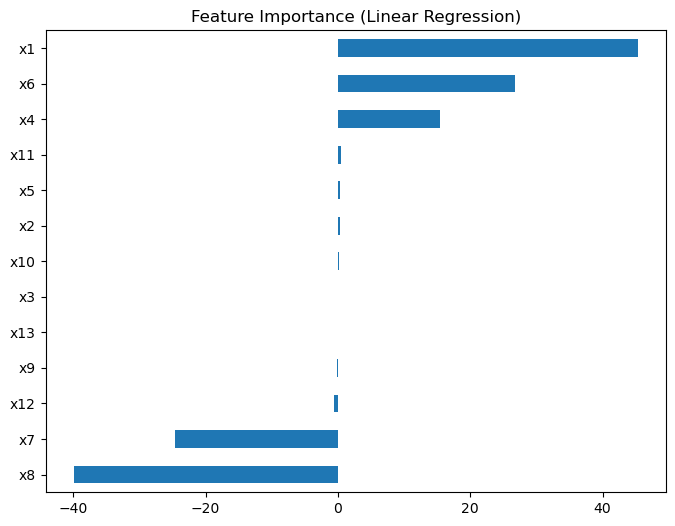

In [18]:
### Feature Importance Visualization for Linear Regression
importance = pd.Series(lr_model.coef_, index=x.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Linear Regression)")
plt.show()